# Analyse de la puissance et du débit de cameras sans fil
### Frederic Lehmann, Hossam Afifi, Hind Castel, Hang Nguyen





## On considère un modèle de communication sans fil (représentant des cameras sans fil), et   l'objectif est de montrer l'impact du bruit sur le débit binaire, et la nécessité d'augmenter la puissance afin de garantir un certain débit binaire. On supposera que la propagation des ondes radio dans un environnement urbain subit une atténuation que l'on représentera par un modèle de Rayleigh.
## Ainsi, les formules étudiées dans ce projet sont basées sur cette hypothèse.

## Ce projet se divise en 2 parties, dans la première on prend en compte la proba d'erreur moyenne et dans la deuxième on utilise la formule de la capacité.

## Pour chacune des questions où il y a des courbes à faire, il faudra les commenter


## Pour ce projet, il faudra importer les librairies suivantes :

#### import numpy as np
#### import matplotlib.pyplot as plt
#### from scipy.special import exp1
#### import math


####  <span style='color: red;'>  en python, on peut utiliser les fonctions suivantes : </span>
math.log, np.exp,  math.exp,  math.sqrt et on sait que :
$$\Gamma(0,\frac{1}{RSB}) =exp1(1.0/RSB) $$ </span>



===========================================================================================




# Partie 1

### On considère des  cameras sans fil, communicant selon le standard 6LowPan et la modulation BPSK.  Elles  sont  placées à des endroits différents (près d'arbres, à l'intérieur de batiments, ...)  ce qui fait que  le rapport signal bruit varie et donc aussi   la probabilité d'erreur binaire moyenne.
### On raisonne par symbole, où un symbole représente 1 bit.

<h3> On a les paramètres suivants : </h3>


### 1. Durée d'un symbole : T (en secondes)
### 2. Energie moyenne par symbole : Es (en joules)
### 3. Densité spectrale du bruit  : No (en Watt/hertz)
### 4. Débit binaire :  D=1/T (en bits/s)
### 5.  Puissance émise  (en Watt) $$Ptx=\frac{Es}{T}= {Es.D} $$
### 6. Rapport signal bruit moyen :  $$\bar{\gamma} =\frac{Es}{No}$$
### 7. Proba d'erreur binaire moyenne (en supposant que l'atténuation sur le canal suit la loi standard de Rayleigh) : $$Pb = \frac{1}{2}. \left( 1-\sqrt{ \frac{\bar{\gamma}}{1+\bar{\gamma}} }   \right)$$



    





### Question 1 : Afin que la camera ait une bonne qualité de transmission, on veut que la proba d'erreur moyenne : $Pb \leq 10^{-2}$, et on veut déduire le  rapport signal bruit moyen en db   $\gamma_{db}$    garantissant cette contrainte.  (On rappelera que $\gamma_{db}=10.log(\bar{\gamma})$ )
### <span style='color: blue;'>  $\Rightarrow$ Faites la courbe de $Pb$ en fonction du rapport signal bruit moyen en db $\gamma_{db}$ (que l'on fera varier de 0 à 40), COMMENTEZ LA COURBE, et déduisez le rapport signal bruit en db répondant à cette contrainte.   Remarque : on visualisera la courbe en échelle semi-logarithmique, ainsi que l'asymptote de la proba de perte qui a pour équation $\frac{0.25}{\bar{\gamma}}$ </span>




<ipython-input-3-2973e8e5d0fe>:10: RuntimeWarning: divide by zero encountered in log
  gamma_db = np.array([10*np.log(i) for i in range(0,nb_valeur)])
<ipython-input-3-2973e8e5d0fe>:16: RuntimeWarning: divide by zero encountered in log10
  Sb_db=10*np.log10(np.linspace(0,nb_valeur-1,nb_valeur))
<ipython-input-3-2973e8e5d0fe>:30: RuntimeWarning: invalid value encountered in double_scalars
  Pb[i] = 0.5*(1-(np.sqrt(Sb_db[i]/(1+Sb_db[i]))))
<ipython-input-3-2973e8e5d0fe>:42: RuntimeWarning: divide by zero encountered in divide
  plt.plot(Sb_db, 0.25/Sb , "o--",  label="Asymptote ",linewidth=3)


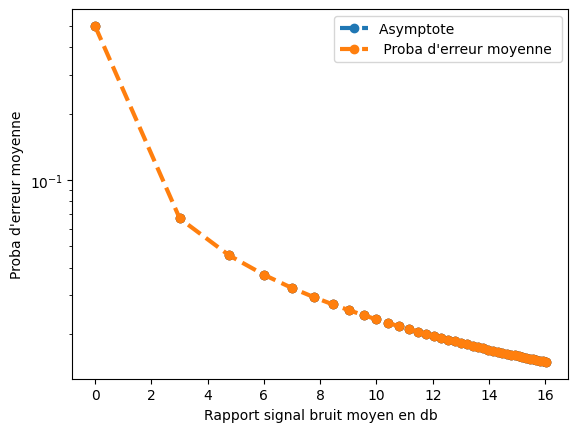

In [ ]:
from pickleshare import PickleShareDB
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import exp1


nb_valeur=41
gamma = np.array([i for i in range(0,nb_valeur)])
gamma_db = np.array([10*np.log(i) for i in range(0,nb_valeur)])
No = [10*10**-13,20*10**-13,30*10**-13]
D = 10**9
gamma_db_opt = 13

# initialisation du tableau des  rapports signal sur bruit  en Db entre 0 et nb_valeur-1
Sb_db=10*np.log10(np.linspace(0,nb_valeur-1,nb_valeur))

# initialisation du tableau de puissance emise à zéro
Ptx = np.zeros(len(No))
for i in range(0, len(No)):
  Ptx[i] = gamma_db_opt*D*No[i]
plt.plot

# initialisation du tableau des du tableau des rapports signal sur bruit   à zero
Sb=np.zeros(nb_valeur)

# initialisation du tableau des probas d'erreur binaires à 0
Pb=np.zeros(nb_valeur)
for i in range(0, nb_valeur):
  Pb[i] = 0.5*(1-(np.sqrt(Sb_db[i]/(1+Sb_db[i]))))

#print(Pb[13])



plt.scatter(Sb_db, Pb, color='black')
plt.xlabel("Rapport signal bruit moyen en db")
plt.ylabel("Proba d'erreur moyenne")


# Affichage de l'asymptote
plt.plot(Sb_db, 0.25/Sb , "o--",  label="Asymptote ",linewidth=3)


# Visualisez la courbe en échelle semi-logarithmique
plt.semilogy(Sb_db, Pb, "o--",  label=" Proba d'erreur moyenne ",linewidth=3)


plt.legend()

plt.show()




### Question 2 : Caméra considérée en 3  endroits  différents
### On se fixe un débit binaire  $D=10 Gbits/s$ et une proba d'erreur $Pb \leq 10^{-2}$, et on suppose  différentes valeurs de puissances bruits No : $$10*10^{-13}, 20*10^{-13} , 30*10^{-13}$$,  (correspondant aux 3 endroits de la caméra) et on veut déduire   la puissance émise Ptx nécessaire.
###  <span style='color: blue;'> $\Rightarrow$ En fonction de l'équation de la puissance émise Ptx, donnez  la formule de la puissance émise en fonction de No </span>


### Question 3 : <span style='color: blue;'> $\Rightarrow$ Faîtes une courbe de   la puissance de l'émetteur nécessaire en fonction de No, et pour un débit constant de   $D=10 Gbits/s$. COMMENTEZ LA COURBE. </span>





### Question 4 : On fixe une puissance Ptx nécessaire (0.01 Watt) pour la caméra, et on veut calculer le débit D  en fonction de No.

### <span style='color: blue;'> $\Rightarrow$ faites une courbe du débit en fonction de No, et COMMENTEZ LA COURBE.

# Partie 2 :

### On utilise la formule suivante de la capacité d'un canal  en  bits/s :
$$C=\frac{B}{2}.E(log_2(1+\alpha^2.2.\frac{Ptx}{BNo}) )$$

### où B est la bande passante en Hertz, et  BNo est la puissance du bruit en Watt

### Le calcul de l'espérance, en supposant que $\alpha$ est une variable aléatoire qui suit la loi de Rayleigh, nous donne la formule suivante :

$$C=\frac{B}{2.ln(2)}. exp(\frac{1}{RSB}). \Gamma(0,\frac{1}{RSB}) $$

### où RSB est le rapport signal sur bruit mesuré (le facteur 2 est du à l'existence de fréquences négatives dans la définition du spectre) $$RSB=\frac{2.Ptx}{BNo}$$.  

### Question 5 : On suppose que B=1 MHz, faites la courbe de la capacité en fonction de RSB (dont la valeur convertie en dB variera de -10 à 30) .  On veut connaitre la valeur minimale de RSB  (convertie en dB) pour que  $C \geq 3Mbits/s$ ?  

### <span style='color: blue;'> $\Rightarrow$ faites une courbe de la capacité du canal en fonction de No, COMMENTEZ LA COURBE, et donnez la valeur de RSB (convertie en dB) répondant à la contrainte  </span>


####  <span style='color: red;'>  en python, on peut utiliser les fonctions suivantes : </span>
math.log, np.exp,  math.exp, , math.sqrt et on sait que :
$$\Gamma(0,\frac{1}{RSB}) =exp1(1.0/RSB) $$ </span>



ValueError: ignored

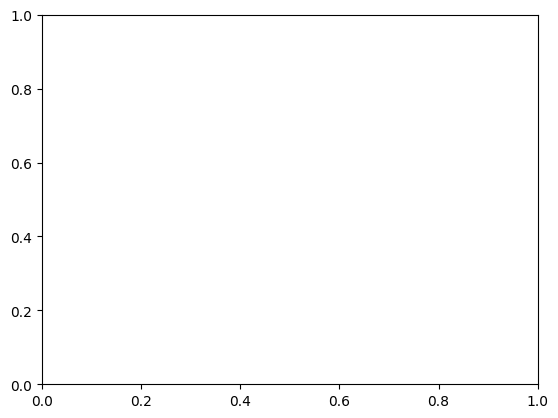

In [ ]:
plt.plot(No,Ptx)

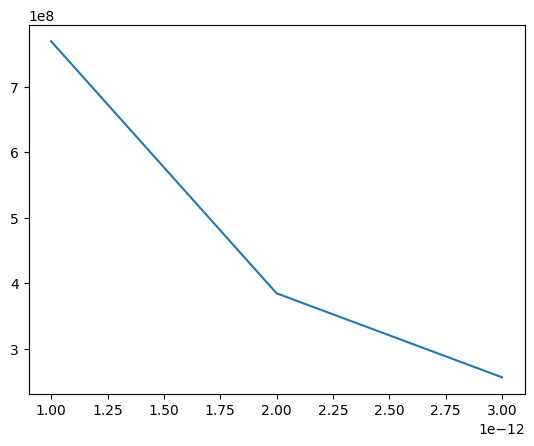

In [ ]:
Ptx = 0.01
D = []
for i in range(0,len(No)):
  D.append(Ptx/(gamma_db_opt*No[i]))
plt.plot(No, D)

-136.9897000433602
nan
-133.97940008672037
nan
-132.21848749616356
nan


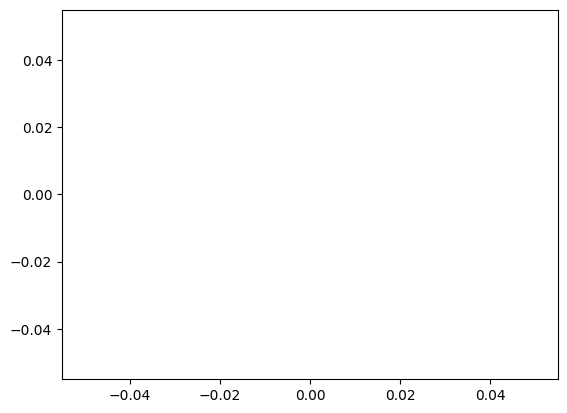

In [ ]:
B = 1
n = 500
RSB = np.linspace(1,1000,500)
C = np.zeros(n)
for i in range(0,n):
  RSB[i] = 10*np.log10(2*Ptx/B*No[i])
  print(RSB[i])
  C[i] = (B/(2*np.log(2)))*np.exp(1/RSB[i])*exp1(1.0/RSB[i])
  print(C[i])

plt.plot(No, C)